# Pandas Review: UN Population Data

**Attribution**: _This notebook is based on a notebook created by Dave Backus, Chase Coleman, Brian LeBlanc, and Spencer Lyon for the NYU Stern Data Bootcamp course_

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from urllib.parse import urljoin

%matplotlib inline

## UN Population Data

We will look at the UN's [population data](http://esa.un.org/unpd/wpp/Download/Standard/Population/). In this notebook, we will focus specifically the age distribution of the population.


### Projection Variants

The population numbers for a particular year are reported as corresopnding to 1 July 2020. There will be two types of population numbers that we discuss:

* *estimates*: Estimates of the population at a point in the past
* *projections*: Forecasts of what the population might be for a given year

Furthermore, the UN will provide various versions of the projections using different modeling assumptions. We will consider three of their population models:

1. *Low variant*: Assumes a low fertility with normal mortality and normal migration.
2. *Medium variant*: Assumes a medium fertility with normal mortality and normal migration.
3. *High variant*: Assumes a high fertility with normal mortality and normal migration

### Loading the data 

We start, as usual, by loading the data.  This will take a minute because the file is about 10 MB in size.

In [2]:
un_base_url = "https://population.un.org/"
path_to_file = "wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/"
filename = ("WPP2019_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.xlsx")

url = urljoin(un_base_url, path_to_file+filename)

In [3]:
cols_to_read = [
    "Variant", "Region, subregion, country or area *", "Country code",
    "Type", "Reference date (as of 1 July)"
]

age_cols = [f"{5*i}-{5*i+4}" for i in range(20)]
age_cols.append("100+")

cols_to_read.extend(age_cols)

sheets = pd.read_excel(
    url, sheet_name=["ESTIMATES", "LOW VARIANT", "MEDIUM VARIANT", "HIGH VARIANT"],
    skiprows=16, usecols=cols_to_read, na_values=["..."]
)

est = sheets["ESTIMATES"]
low_proj = sheets["LOW VARIANT"]
med_proj = sheets["MEDIUM VARIANT"]
hgh_proj = sheets["HIGH VARIANT"]

# Combine all of the datasets into one
df = pd.concat([est, low_proj, med_proj, hgh_proj], axis=0, ignore_index=True)

What does our data contain?


In [4]:
df.head()

,Variant,"Region, subregion, country or area *",Country code,Type,Reference date (as of 1 July),0-4,5-9,10-14,15-19,20-24,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,Estimates,WORLD,900,World,1950,338496.583,270083.424,261028.395,239487.998,222895.854,...,88673.574,73448.221,55142.936,37383.415,21901.818,9627.050,3474.928,947.494,197.844,33.899
1,Estimates,WORLD,900,World,1955,407177.108,316013.746,263432.161,255370.599,232636.975,...,97657.826,77072.976,59538.329,40492.825,23753.701,11309.453,3627.295,916.972,165.442,24.153
2,Estimates,WORLD,900,World,1960,434008.148,383756.327,309874.554,257985.051,248984.018,...,109466.124,85360.390,63028.715,44212.050,26016.497,12358.879,4386.819,966.933,163.618,20.487
3,Estimates,WORLD,900,World,1965,479303.511,411062.929,376011.843,304327.984,252276.222,...,119923.918,96280.769,70710.109,47734.160,29554.683,14364.495,5106.559,1259.124,178.743,20.392
4,Estimates,WORLD,900,World,1970,524080.098,459404.155,405658.350,370848.099,298471.479,...,130546.038,107839.617,82238.542,55586.519,33115.927,17198.592,6269.952,1536.383,245.600,23.137


In [5]:
print("Dimensions and dtypes of estimates:")
print(df.shape)
print(df.dtypes)

Dimensions and dtypes of estimates:
(16830, 26)
Variant                                  object
Region, subregion, country or area *     object
Country code                              int64
Type                                     object
Reference date (as of 1 July)             int64
0-4                                     float64
5-9                                     float64
10-14                                   float64
15-19                                   float64
20-24                                   float64
25-29                                   float64
30-34                                   float64
35-39                                   float64
40-44                                   float64
45-49                                   float64
50-54                                   float64
55-59                                   float64
60-64                                   float64
65-69                                   float64
70-74                                   

### Clean data

The first step to using this data is to make sure that the data is clean.

In [6]:
df.head()

,Variant,"Region, subregion, country or area *",Country code,Type,Reference date (as of 1 July),0-4,5-9,10-14,15-19,20-24,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,Estimates,WORLD,900,World,1950,338496.583,270083.424,261028.395,239487.998,222895.854,...,88673.574,73448.221,55142.936,37383.415,21901.818,9627.050,3474.928,947.494,197.844,33.899
1,Estimates,WORLD,900,World,1955,407177.108,316013.746,263432.161,255370.599,232636.975,...,97657.826,77072.976,59538.329,40492.825,23753.701,11309.453,3627.295,916.972,165.442,24.153
2,Estimates,WORLD,900,World,1960,434008.148,383756.327,309874.554,257985.051,248984.018,...,109466.124,85360.390,63028.715,44212.050,26016.497,12358.879,4386.819,966.933,163.618,20.487
3,Estimates,WORLD,900,World,1965,479303.511,411062.929,376011.843,304327.984,252276.222,...,119923.918,96280.769,70710.109,47734.160,29554.683,14364.495,5106.559,1259.124,178.743,20.392
4,Estimates,WORLD,900,World,1970,524080.098,459404.155,405658.350,370848.099,298471.479,...,130546.038,107839.617,82238.542,55586.519,33115.927,17198.592,6269.952,1536.383,245.600,23.137


**Geography types**

There are currently many different geography types including `World`, `Label/Separator`, `Development Group`, `Income Group`, ..., and `Country/Area`.

For what we're going to do today, we're going to focus on country level information.

In [7]:
df = df.query("Type == 'Country/Area'")

df.head()


,Variant,"Region, subregion, country or area *",Country code,Type,Reference date (as of 1 July),0-4,5-9,10-14,15-19,20-24,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
390,Estimates,Burundi,108,Country/Area,1950,377.410,302.773,263.763,233.965,205.203,...,56.494,45.214,34.217,22.372,12.313,4.335,1.314,0.247,0.027,0.002
391,Estimates,Burundi,108,Country/Area,1955,469.173,326.368,280.865,248.052,218.639,...,65.838,46.810,34.866,23.435,12.744,5.336,1.287,0.244,0.027,0.002
392,Estimates,Burundi,108,Country/Area,1960,511.173,410.646,304.263,265.166,232.843,...,72.308,55.158,36.543,24.264,13.671,5.705,1.660,0.253,0.028,0.002
393,Estimates,Burundi,108,Country/Area,1965,567.944,448.936,383.571,286.784,248.528,...,79.061,60.755,43.397,25.700,14.386,6.276,1.843,0.343,0.032,0.002
394,Estimates,Burundi,108,Country/Area,1970,637.109,509.627,436.683,374.092,271.404,...,86.322,66.703,48.061,30.897,15.484,6.752,2.098,0.398,0.044,0.002


**Renaming**

Many column names aren't easily typable or usable. We will resolve this by renaming the columns and will use the conventions below for renaming our columns:

* Short and memorable (using standard conventions where possible)
* Lower case with underscores to separate words when needed
* Consistent <- Most important

In [8]:
renamers = {
    "Variant": "variant",
    "Region, subregion, country or area *": "country",
    "Country code": "alpha3",
    "Type": "type",
    "Reference date (as of 1 July)": "year"
}

# Rename the columns and drop type column (since we've already restricted
# to just countries)
df = df.rename(
    columns=renamers
).drop(
    ["type"], axis=1
)

df.head()


,variant,country,alpha3,year,0-4,5-9,10-14,15-19,20-24,25-29,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
390,Estimates,Burundi,108,1950,377.410,302.773,263.763,233.965,205.203,179.448,...,56.494,45.214,34.217,22.372,12.313,4.335,1.314,0.247,0.027,0.002
391,Estimates,Burundi,108,1955,469.173,326.368,280.865,248.052,218.639,190.310,...,65.838,46.810,34.866,23.435,12.744,5.336,1.287,0.244,0.027,0.002
392,Estimates,Burundi,108,1960,511.173,410.646,304.263,265.166,232.843,203.917,...,72.308,55.158,36.543,24.264,13.671,5.705,1.660,0.253,0.028,0.002
393,Estimates,Burundi,108,1965,567.944,448.936,383.571,286.784,248.528,217.027,...,79.061,60.755,43.397,25.700,14.386,6.276,1.843,0.343,0.032,0.002
394,Estimates,Burundi,108,1970,637.109,509.627,436.683,374.092,271.404,232.378,...,86.322,66.703,48.061,30.897,15.484,6.752,2.098,0.398,0.044,0.002


**Reshaping**

The data currently has one column for each age group. We'll update the data to be a long-form rather than wide-form to make it "tidy"

In [9]:
df = df.melt(id_vars=["variant", "country", "alpha3", "year"], var_name="age")

df.head()


,variant,country,alpha3,year,age,value
0,Estimates,Burundi,108,1950,0-4,377.410
1,Estimates,Burundi,108,1955,0-4,469.173
2,Estimates,Burundi,108,1960,0-4,511.173
3,Estimates,Burundi,108,1965,0-4,567.944
4,Estimates,Burundi,108,1970,0-4,637.109


**Population sizes**

Let's focus on countries that had more than 50,000,000 people in 2010, 2015, and 2020 according to the estimates data.

In order to do this, we're going to use a pivot table to determine how many people were in each country during each year and then use boolean selection

In [10]:
pop_sizes = (
    df.query("variant == 'Estimates'")
      .pivot_table(index="country", columns="year", values="value", aggfunc="sum")
)

# Get list of the countries with more than 50m people
countries_pop_gt_50m_bool = (pop_sizes.loc[:, 2010:2020] > 50_000).all(axis=1)
countries_pop_gt_50m = countries_pop_gt_50m_bool.index[countries_pop_gt_50m_bool].tolist()

In [11]:
df_gt_50m = df.query("country in @countries_pop_gt_50m")

df_gt_50m.head()


,variant,country,alpha3,year,age,value
60,Estimates,Ethiopia,231,1950,0-4,3327.721
61,Estimates,Ethiopia,231,1955,0-4,3507.758
62,Estimates,Ethiopia,231,1960,0-4,3875.947
63,Estimates,Ethiopia,231,1965,0-4,4507.785
64,Estimates,Ethiopia,231,1970,0-4,5159.479


### Visualizations

Let's now begin visually exploring our data.

**Plotting age distribution**

Below, we'll begin plotting the age distributions of certain countries in different years. Let's start by plotting the age distribution in China for 1960, 1990, 2020, 2050, and 2080.

To do this, we  will need `year` on the index and `age` as the columns.

In [12]:
china_sel = "country == 'China' & (variant=='Estimates' | variant=='Medium variant')"
df_china = (
    df.query(china_sel)
      .pivot_table(index="age", columns="year", values="value")
      .loc[:, range(1960, 2100, 30)]
)


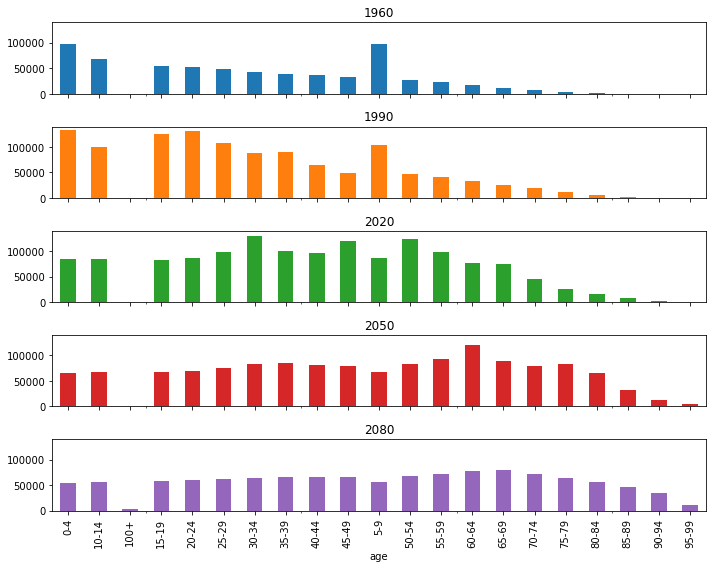

In [13]:
ax = df_china.plot(
    kind="bar", figsize=(10, 8), subplots=True, sharey=True,
    legend=False
)

fig = ax[0].get_figure()
fig.tight_layout()

What's wrong with the graph?

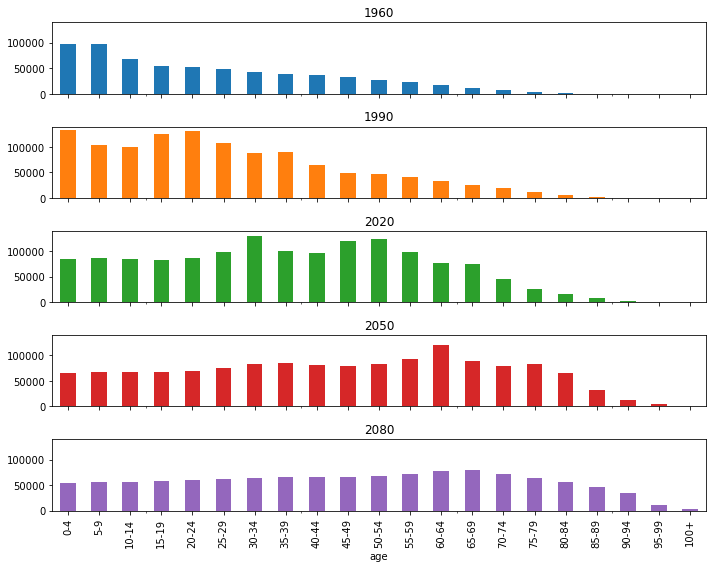

In [14]:
ax = df_china.loc[age_cols, :].plot(
    kind="bar", figsize=(10, 8), subplots=True, sharey=True,
    legend=False
)

fig = ax[0].get_figure()
fig.tight_layout()

Maybe we want to see the fraction of the population in each bin rather than the number of people

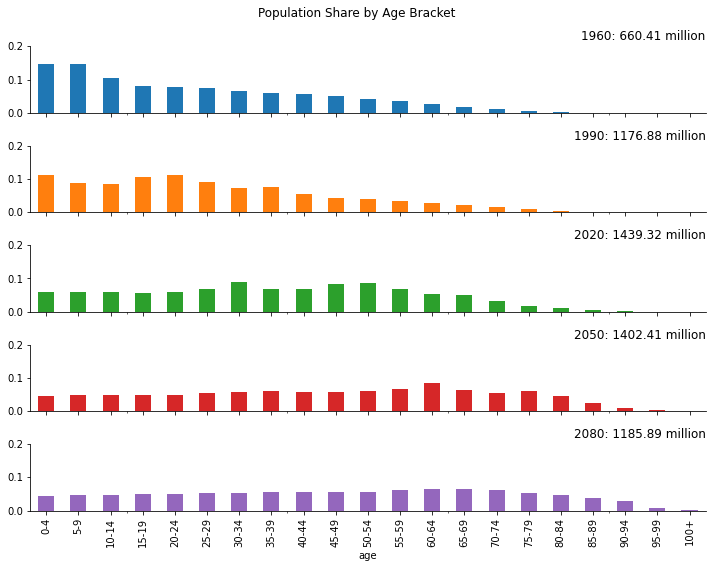

In [15]:
ax = (
    df_china.divide(df_china.sum(axis=0), axis=1)
            .loc[age_cols, :]
            .plot(
                kind="bar", figsize=(10, 8), subplots=True,
                sharey=True, legend=False, ylim=(0.0, 0.2),
                title="Population Share by Age Bracket"
            )
)

for (i, _ax) in enumerate(ax):
    _population_m = df_china.iloc[:, i].sum()/1000
    _title = f"{df_china.columns[i]}: {_population_m:.2f} million"
    _ax.set_title("")
    _ax.set_title(_title, loc="right")
    _ax.spines["right"].set_visible(False)
    _ax.spines["top"].set_visible(False)

fig = ax[0].get_figure()
fig.tight_layout()


If we wanted a similar graph for another country, we could potentially copy and paste what we wrote, but, if we made minor changes then we could potentially introduce unexpected errors when trying to write them.

Instead, let's write a function that creates a graph like this.

In [16]:
def age_distribution_graph(data, country, years, forecast_variant="Medium variant"):
    # Subset the data
    sel = f"country == '{country}' & (variant=='Estimates' | variant=='{forecast_variant}')"
    plot_df = (
        data.query(sel)
            .pivot_table(index="age", columns="year", values="value")
            .loc[:, years]
    )
    
    # Create the plot
    ax = (
        plot_df.divide(plot_df.sum(axis=0), axis=1)
            .loc[age_cols, :]
            .plot(
                kind="bar", figsize=(10, 8), subplots=True,
                sharey=True, legend=False, ylim=(0.0, 0.2),
                title=None
            )
    )

    for (i, _ax) in enumerate(ax):
        _population_m = plot_df.iloc[:, i].sum()/1000
        _title = f"{plot_df.columns[i]}: {_population_m:.2f} million"
        _ax.set_title("")
        _ax.set_title(_title, loc="right")
        _ax.spines["right"].set_visible(False)
        _ax.spines["top"].set_visible(False)

    fig = ax[0].get_figure()
    ax[0].set_title(f"Population Share by Age Bracket for {country}", loc="left")
    fig.tight_layout()
    
    return fig


### Population graphs

In [17]:
years_of_interest = [1980, 1990, 2000, 2020, 2050, 2100]

**China**

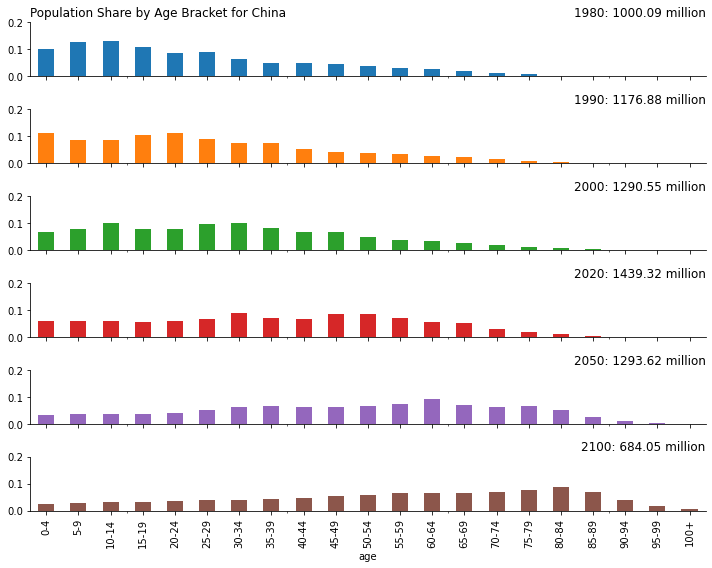

In [18]:
age_distribution_graph(df, "China", years_of_interest, "Low variant");

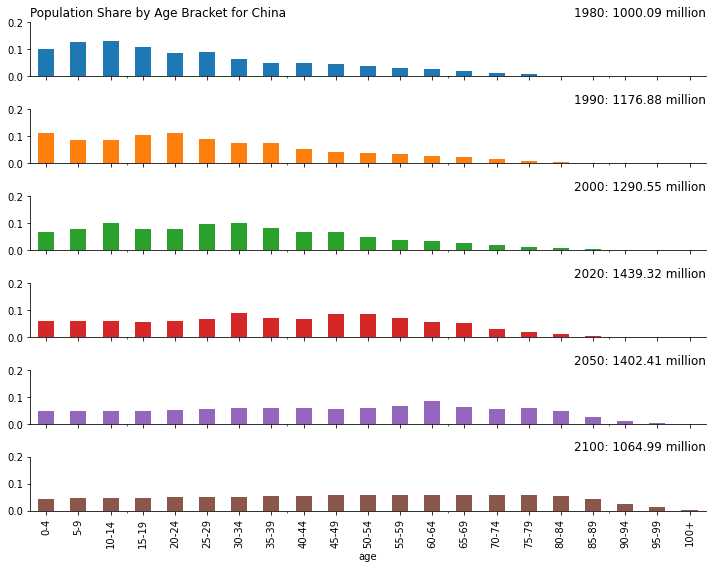

In [19]:
age_distribution_graph(df, "China", years_of_interest, "Medium variant");

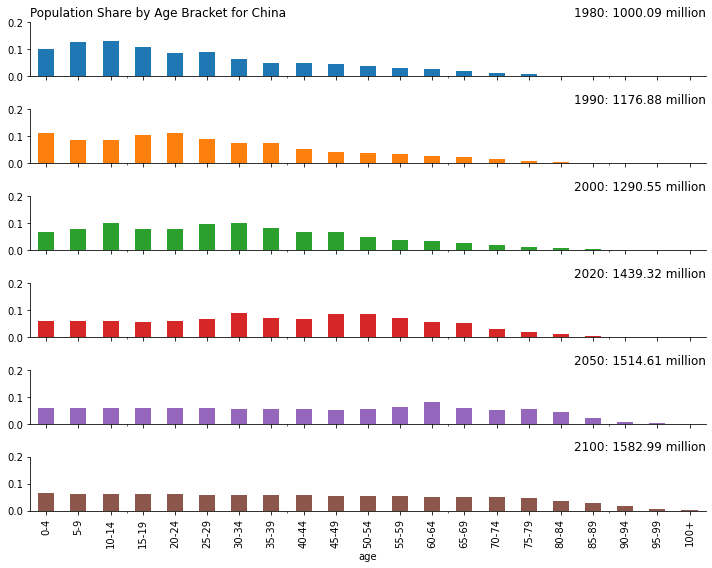

In [20]:
age_distribution_graph(df, "China", years_of_interest, "High variant");

**India**

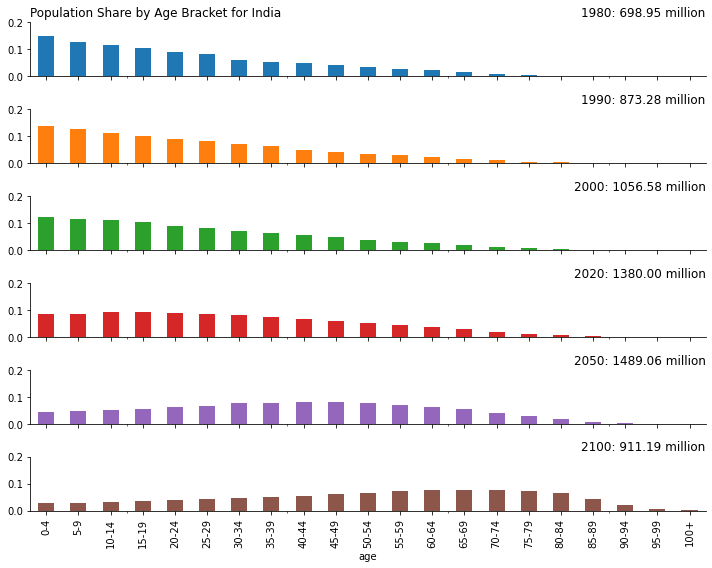

In [21]:
age_distribution_graph(df, "India", years_of_interest, "Low variant");

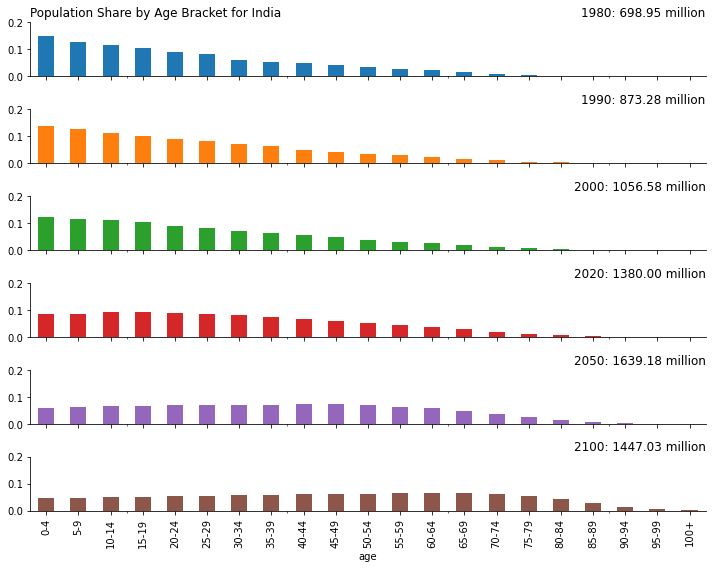

In [22]:
age_distribution_graph(df, "India", years_of_interest, "Medium variant");

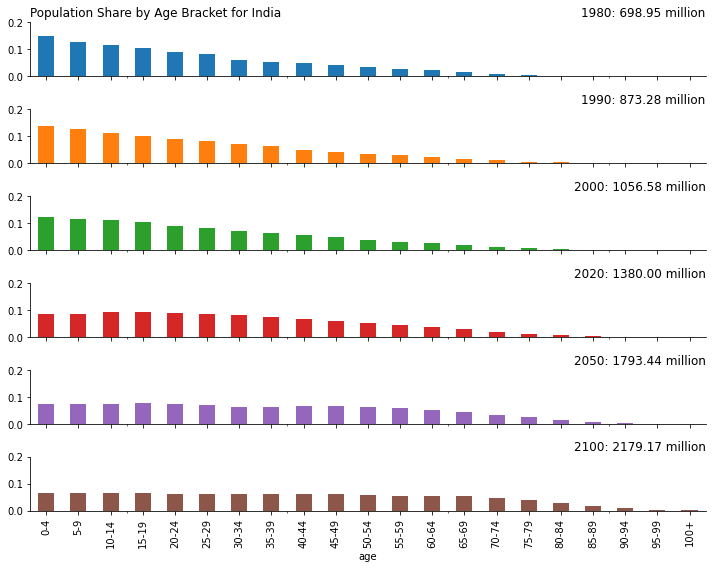

In [23]:
age_distribution_graph(df, "India", years_of_interest, "High variant");

**United States of America**

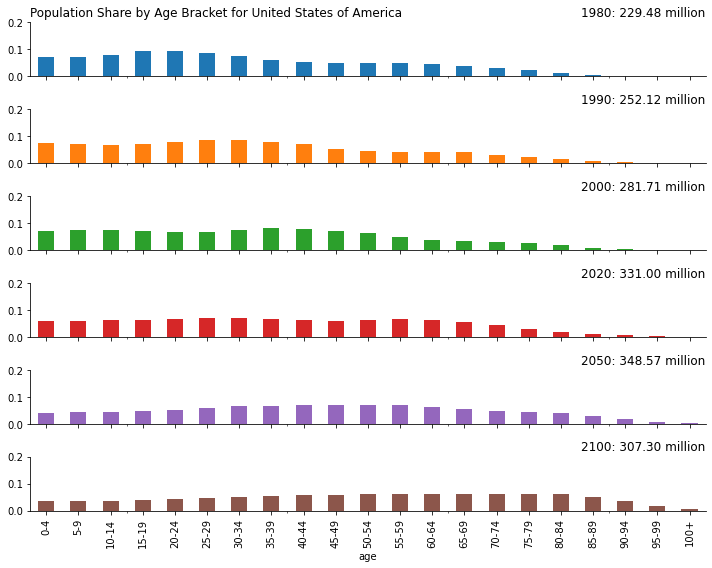

In [24]:
age_distribution_graph(df, "United States of America", years_of_interest, "Low variant");

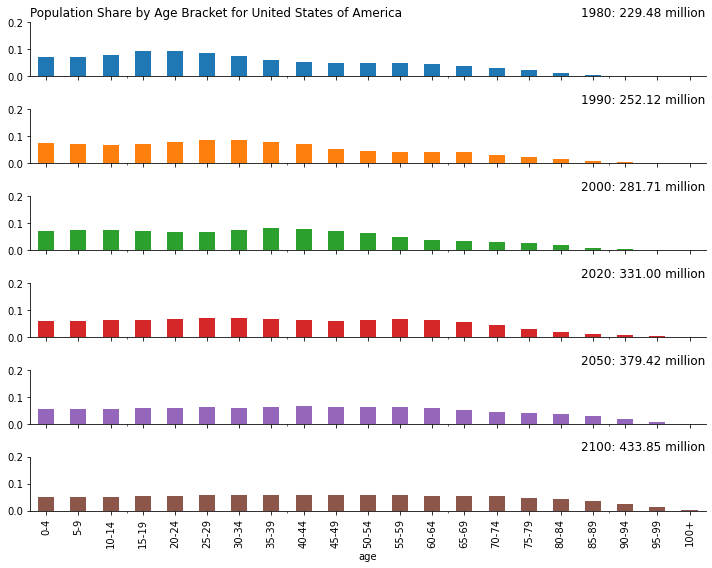

In [25]:
age_distribution_graph(df, "United States of America", years_of_interest, "Medium variant");

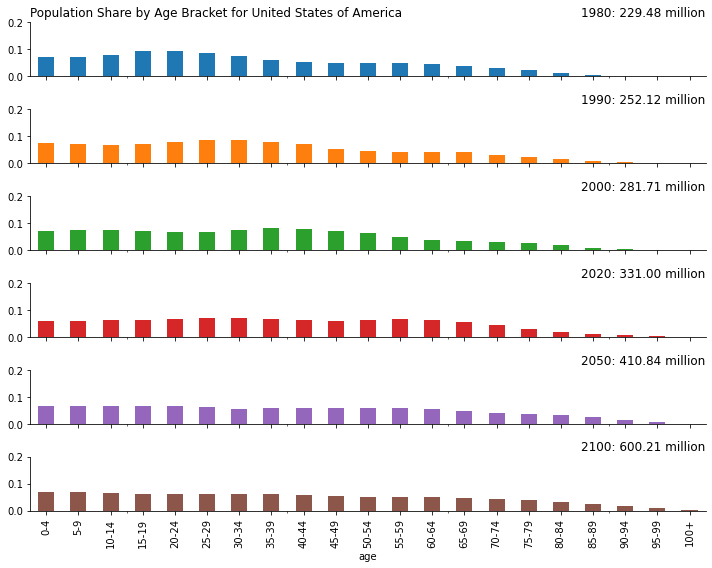

In [26]:
age_distribution_graph(df, "United States of America", years_of_interest, "High variant");

## Why do we care about age distribution?

Lots of reasons, but one that we (as young working-age adults) should be particularly interested in is social security programs.


_Definition: **Dependency ratio**_

> The (old-age) dependency ratio relates the number of persons aged 65 or over per 100 persons aged 15-64.

We care about this measurement because it tells us roughly how many working age people there are to support those who have stopped working. As the population distribution shifts to the right (and if nothing changes), there will be fewer individuals to support the social security programs that support the old (non-working) population.

In [27]:
# Compute old-age dependency ratio for countries with more than
# 50,000,000 people
working_age = [f"{5*i}-{5*i + 4}" for i in range(20) if 5*i >= 15 and 5*i<65]
old_age = [f"{5*i}-{5*i + 4}" for i in range(20) if 5*i>=65] + ["100+"]

df_gt_50m.loc[:, "age_classification"] = "young"
wa = df_gt_50m["age"].isin(working_age)
df_gt_50m.loc[wa, "age_classification"] = "work"
oa = df_gt_50m["age"].isin(old_age)
df_gt_50m.loc[oa, "age_classification"] = "old"

dr = (
    df_gt_50m.query("variant == 'Estimates' | variant == 'Medium variant'")
             .pivot_table(
                 index=["country", "year"],
                 columns="age_classification", values="value"
             )
)

dr.loc[:, "dep_ratio"] = 100 * (dr.loc[:, "old"] / dr.loc[:, "work"])

dr = dr["dep_ratio"].unstack(level="country")

dr.head()


/Users/fabrizio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/fabrizio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


country,Bangladesh,Brazil,China,Democratic Republic of the Congo,Egypt,Ethiopia,France,Germany,India,Indonesia,...,Nigeria,Pakistan,Philippines,Russian Federation,South Africa,Thailand,Turkey,United Kingdom,United States of America,Viet Nam
year,,,,,,,,,,,,,,,,,,,,,
1950,8.916253,6.703806,8.998544,9.003321,6.352807,7.090803,21.610061,17.956300,6.608494,8.704515,...,6.743726,12.887040,8.494759,9.245952,8.834897,7.426285,6.486303,20.296357,15.803165,8.170606
1955,6.769528,6.911350,8.680643,7.366439,7.656458,6.507106,22.600143,19.368557,6.784368,8.134944,...,6.342524,10.971574,8.131134,10.210903,8.724943,7.600568,7.114916,21.564029,17.755147,9.288469
1960,6.092630,7.335921,8.161966,6.830735,8.776141,6.123157,23.494745,21.382422,6.741824,7.863127,...,6.352682,9.571077,7.747706,11.967412,8.728576,7.679839,7.262934,22.602782,18.930133,10.704215
1965,6.180719,7.823695,7.725386,6.639102,9.229902,5.940369,24.279444,24.113775,7.288635,7.644602,...,6.500251,8.871228,7.542495,13.050977,8.843299,8.110855,8.640398,23.636602,19.555596,12.126652
1970,6.598082,7.898549,8.389389,6.670493,9.655661,6.335240,25.779626,26.963552,7.405030,7.719518,...,6.485831,8.833273,7.285555,14.605470,8.595380,8.333038,9.159363,25.938640,20.312315,13.244873


**Sustainable dependency ratio**

Obviously the age of retirement could be adjusted which would make the dependency ratio, as we've calculated it, a worse measure of dependence. However, just as a thought experiment, let's suppose that the dependency ratio that is sustainable long term (i.e. the payments to social security are roughly the same as the social security tax collected) is 50 (which means that there are 2 workers for each person over 65).

Of our countries with over 50 million citizens, how many countries will be sustainable in 2080? In 2100?

Text(0.5, 1.0, 'Dependency Ratios for countries with 50m+ citizens')

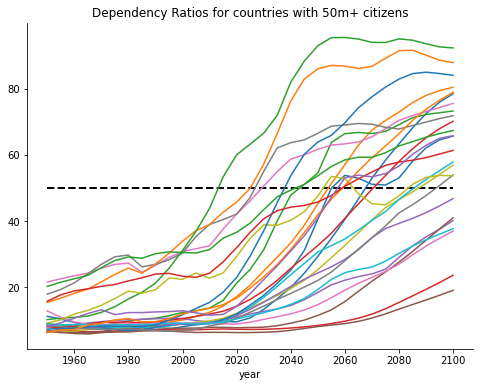

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

dr.plot(kind="line", ax=ax, legend=False)
ax.hlines(50, 1950, 2100, color="k", linewidth=2.0, linestyle="--")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title("Dependency Ratios for countries with 50m+ citizens")

In [29]:
dr_2080 = dr.loc[2080, :]
dr_2080.index[dr_2080 < 50]

Index(['Democratic Republic of the Congo', 'Egypt', 'Ethiopia', 'India',
       'Indonesia', 'Myanmar', 'Nigeria', 'Pakistan', 'Philippines',
       'Russian Federation', 'South Africa'],
      dtype='object', name='country')

In [30]:
dr_2100 = dr.loc[2100, :]
dr_2100.index[dr_2100 < 50]

Index(['Democratic Republic of the Congo', 'Egypt', 'Ethiopia', 'Myanmar',
       'Nigeria', 'Pakistan', 'South Africa'],
      dtype='object', name='country')